#### Non-Parallel Markov Chain Code

time =      4.739


<Axes: >

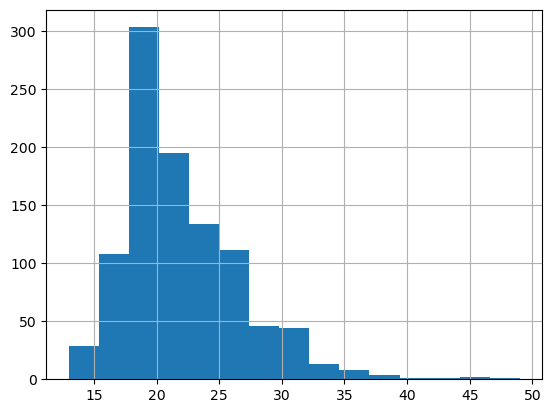

In [1]:
import numpy as np
import math
import time
import pandas as pd

def maximum_run_length(X):
    n=len(X)
    current_value=X[0]
    current_run_length=1
    maximum_run_length=0
    for i in range(1,n):
        if X[i]==current_value:
            current_run_length+=1
        else:
            current_value=X[i]
            maximum_run_length=max(maximum_run_length,current_run_length)
            current_run_length=1
    maximum_run_length=max(maximum_run_length,current_run_length)
    return maximum_run_length

# Function to do a single realization of X[0],...,X[n] for the Markov chain
def simulate_once(args):
    n=args[0]
    p=args[1]
    seed=args[2]
    np.random.seed(seed)
    X=np.zeros(n)
    X[0]=-1
    for i in range(1,n):
        s=np.random.choice([1,-1],p=(p,1-p))
        X[i]=s*X[i-1]
    m=maximum_run_length(X)
    return(m)

# Set the values of the parameters
N=1000 
n=1000
p=.75

# Create a list of 2-tuples and apply simulate_once() to every 2-tuple using map.
time0 = time.process_time()
arglist=[(n,p,i) for i in range(N)]
result = list(map(simulate_once,arglist))
time1=time.process_time()
print("time = "+ "{:10.3f}".format(time1-time0))
pd.Series(result).hist(bins=15)

#### Parralel Markov Chain Code

In [ ]:
import numpy as np
import math
import multiprocessing as mp
import time

# Maxium run length
def maximum_run_length(X):
    n=len(X)
    current_value=X[0]
    current_run_length=1
    maximum_run_length=0
    for i in range(1,n):
        if X[i]==current_value:
            current_run_length+=1
        else:
            current_value=X[i]
            maximum_run_length=max(maximum_run_length,current_run_length)
            current_run_length=1
    maximum_run_length=max(maximum_run_length,current_run_length)
    return maximum_run_length

# Function to do a single realization of X[0],...,X[n] for the Markov chain
def simulate_once(args):
    n=args[0]
    p=args[1]
    seed=args[2]
    np.random.seed(seed)
    X=np.zeros(n)
    X[0]=-1
    for i in range(1,n):
        s=np.random.choice([1,-1],p=(p,1-p))
        X[i]=s*X[i-1]
    m=maximum_run_length(X)
    return(m)

N=1000
n=1000
p=.75
nprocesses=4

if __name__=="__main__":
    time0 = time.time()
    # create a pool of workers
    pool = mp.Pool(nprocesses)

    # create a list of arguments
    arglist=[(n,p) for i in range(N)]

    # use pool.map to apply the simulate_once function to every element in the argument list
    result = pool.map(simulate_once,arglist)
    pool.close()
    pool.join()
    time1=time.time()
    print("time = "+ "{:10.3f}".format(time1-time0))
    pd.Series(result).hist(bins=15)

The takeaway: 

'result = list(map(simulate_once, arglist))'
- Python’s built-in map() runs one simulation at a time, in sequence, on a single CPU core.
- Each call to simulate_once() runs to completion before the next starts.
- Only one core is ever used.

Workflow: simulate_once(0) → simulate_once(1) → ... → simulate_once(999)

'pool = mp.Pool(nprocesses)'
'result = pool.map(simulate_once, arglist)'
- Each worker runs in a separate Python interpreter with its own memory space.
- The main process divides the arglist among the workers.
- The workers execute simulate_once() simultaneously on different CPU cores.

Workflow: 
Core 1 → simulate_once(0..249)
Core 2 → simulate_once(250..499)
Core 3 → simulate_once(500..749)
Core 4 → simulate_once(750..999)

Remark:
'if __name__ == "__main__"': 
This guard is mandatory on Windows and macOS, because multiprocessing re-imports the main module when spawning workers.
Without it, the workers would recursively create more workers, causing infinite recursion.